In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology
import scipy.ndimage as ndimage
import cv2

In [6]:
img = cv2.imread('plates/obs5.png', cv2.IMREAD_GRAYSCALE)
np.array(img)
img = np.flipud(img)

mask = img > 145

plt.figure(figsize=(3, 3))
plt.pcolormesh(mask)

ValueError: Input must be >= 1-d.

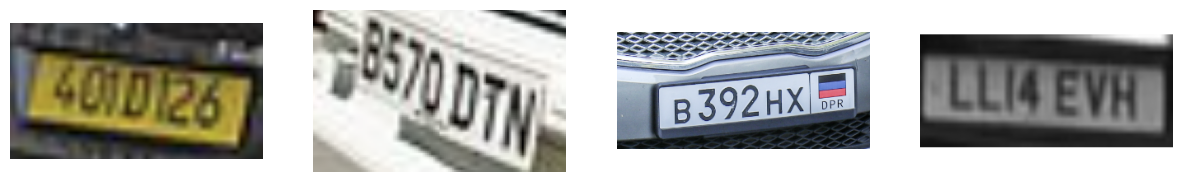

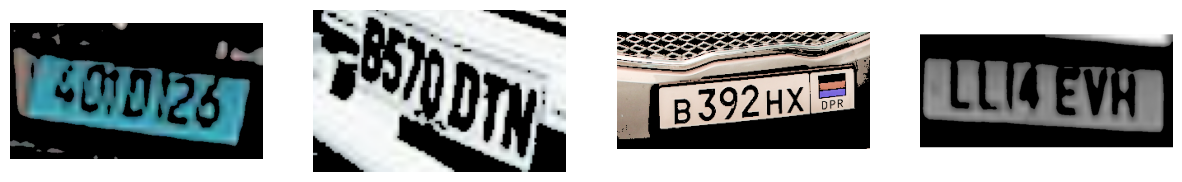

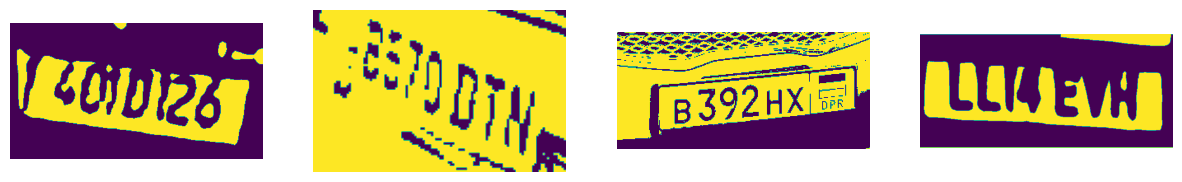

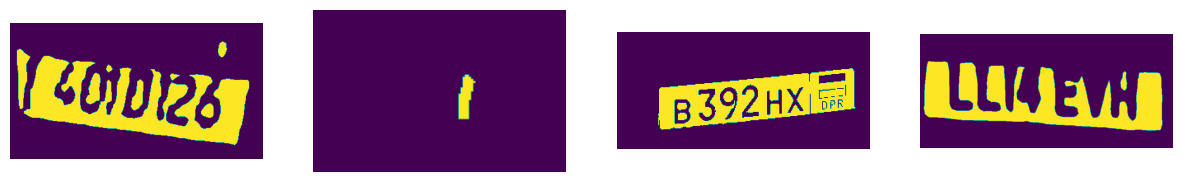

In [ ]:
files = os.listdir('plates')
num_files = len(files)

def plotOriginals():
    # sort the files
    files.sort()

    # create a figure
    fig = plt.figure(figsize=(15, 3))
    # loop over the files
    for i, file in enumerate(files):
        # read the image
        img = cv2.imread('plates/' + file)
        # convert the image to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # add the image to the figure
        fig.add_subplot(1, num_files, i + 1)
        plt.imshow(img)
        plt.axis('off')

def mask(img):
    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply a threshold to the image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # find the contours of the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # create a mask
    mask = np.zeros_like(img)
    # draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
    # apply the mask to the image
    masked = cv2.bitwise_and(img, mask)
    return masked

def plot_mask():
    fig = plt.figure(figsize=(15, 3))

    # loop over the files
    for i, file in enumerate(files):
        # read the image
        img = cv2.imread('plates/' + file)
        # apply the mask to the image
        img = mask(img)
        # add the image to the figure
        fig.add_subplot(1, num_files, i + 1)
        plt.imshow(img)
        plt.axis('off')

def mask_letters(img):
    np.array(img)
    img = np.flipud(img)
    mask = img > 110
    mask = np.flipud(mask)

    return mask

def plot_mask_letters():
    fig = plt.figure(figsize=(15, 3))

    # loop over the files
    for i, file in enumerate(files):
        # read the image
        img = cv2.imread('plates/' + file, cv2.IMREAD_GRAYSCALE)
        # apply the mask to the image
        img = mask_letters(img)
        # add the image to the figure
        fig.add_subplot(1, num_files, i + 1)
        plt.imshow(img)
        plt.axis('off')

def informed_mask_letters(img):
    np.array(img)
    img = np.flipud(img)

    # mask = (img < 90) & (img > 50)
    mask = img > 110

    mask_labeled, num_labels = ndi.label(mask)
    slices = ndi.find_objects(mask_labeled)

    # Create a new mask without the components touching the border
    new_mask = np.zeros_like(mask_labeled)
    for i, slc in enumerate(slices, start=1):
        is_border = False
        for s, dim in zip(slc, mask_labeled.shape):
            if s.start == 0 or s.stop == dim:
                is_border = True
                break
        if not is_border:
            new_mask[slc] = mask_labeled[slc] * (mask_labeled[slc] == i)

    # Replace the original mask with the new mask
    # mask = new_mask > 0
    mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(mask)

    # Preprocess the image
    # Apply any necessary filtering, denoising, or smoothing operationss
    # For example, using a Gaussian filter:
    image_filtered = ndimage.gaussian_filter(img, sigma=1)

    # # Apply thresholding to create a binary mask
    # mask = image_filtered > 0.1  # Replace threshold_value with an appropriate value

    # Remove small components from the mask
    mask = morphology.remove_small_objects(mask, min_size=40, connectivity=0)

    # Label the connected components
    mask_labeled = morphology.label(mask, connectivity=1)
    slices = ndi.find_objects(mask_labeled)

    #Create a new mask without the components touching the border
    new_mask = np.zeros_like(mask_labeled)
    for i, slc in enumerate(slices, start=1):
        is_border = False
        for s, dim in zip(slc, mask_labeled.shape):
            if s.start == 0 or s.stop == dim:
                is_border = True
                break
        if not is_border:
            new_mask[slc] = mask_labeled[slc] * (mask_labeled[slc] == i)

    # Replace the original mask with the new mask
    mask = new_mask > 0

    return mask

def plot_informed_mask_letters():
    fig = plt.figure(figsize=(15, 3))

    # loop over the files
    for i, file in enumerate(files):
        # read the image
        img = cv2.imread('plates/' + file, cv2.IMREAD_GRAYSCALE)
        # apply the mask to the image
        img = informed_mask_letters(img)
        # add the image to the figure
        fig.add_subplot(1, num_files, i + 1)
        plt.imshow(np.flipud(img))
        plt.axis('off')

    
# create a figure
plotOriginals()
plot_mask()
plot_mask_letters()
plot_informed_mask_letters()



In [25]:
type(img)

NoneType